In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import autograd
import torch.nn.functional as F

images = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/images.npy")
labels = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/labels.npy")
test = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/test_images.npy")
height = images.shape[1]
width = images.shape[2]
size = height * width
images = (images - images.mean()) / images.std()
data = images.reshape(images.shape[0],size)
test_data = test.reshape(test.shape[0], size)
test_data = (test_data - test_data.mean()) / test_data.std()
batch_size = 1
NUM_OPT_STEPS = 5000
train_seqs, train_labels = data[0:45000,:], labels[0:45000]
val_seqs, val_labels = data[45000:,:], labels[45000:]

In [12]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(height * width, 5)
    def forward(self, x):
        x = self.linear(x)
        return x

In [13]:
model = LinearModel()

In [14]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

In [15]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_seqs.shape[0], size=batch_size, replace=False)
    x = autograd.Variable(torch.from_numpy(train_seqs[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int))).long()
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    optimizer.step()
    return loss.data[0]


In [16]:
def accuracy(y, y_hat):
    return (y == y_hat).astype(np.float).mean()

In [17]:
def approx_train_accuracy(model):
    i = np.random.choice(train_seqs.shape[0], size=1000, replace=False)
    x = autograd.Variable(torch.from_numpy(train_seqs[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int)))
    y_hat_ = model(x)
    pred = []
    for j in range(y_hat_.size()[0]):
        logits = y_hat_[j,:].data.numpy()
        pred.append(np.argmax(logits))
    return accuracy(pred, y.data.numpy())

In [18]:
def val_accuracy(model):
    x = autograd.Variable(torch.from_numpy(val_seqs.astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(val_labels.astype(np.int)))
    y_hat_ = model(x)
    pred = []
    for j in range(y_hat_.size()[0]):
        logits = y_hat_[j,:].data.numpy()
        pred.append(np.argmax(logits))
    return accuracy(pred, y.data.numpy())

In [19]:
def plot_accuracies(tr, v):
    ind = list(range(len(tr)))
    plt.plot(ind,tr,'-ro')
    plt.title('Training accuracy as a function of iteration')
    plt.xlabel('iteration')
    plt.ylabel('training accuracy')
    plt.show()
    plt.plot(ind,v,'-go')
    plt.title('Validation accuracy as a function of iteration')
    plt.xlabel('iteration')
    plt.ylabel('validation accuracy')
    plt.show()

     0  0.24  0.26
   100  0.25  0.26
   200  0.26  0.26
   300  0.25  0.26
   400  0.26  0.26
   500  0.24  0.26
   600  0.27  0.26
   700  0.26  0.26
   800  0.26  0.26
   900  0.26  0.26
  1000  0.23  0.27
  1100  0.28  0.27
  1200  0.28  0.27
  1300  0.26  0.27
  1400  0.25  0.27
  1500  0.28  0.27
  1600  0.29  0.27
  1700  0.28  0.27
  1800  0.30  0.27
  1900  0.25  0.27
  2000  0.26  0.27
  2100  0.28  0.27
  2200  0.27  0.27
  2300  0.24  0.27
  2400  0.27  0.27
  2500  0.25  0.27
  2600  0.25  0.27
  2700  0.26  0.28
  2800  0.26  0.28
  2900  0.27  0.28
  3000  0.28  0.28
  3100  0.26  0.28
  3200  0.30  0.28
  3300  0.26  0.28
  3400  0.28  0.28
  3500  0.30  0.28
  3600  0.30  0.28
  3700  0.27  0.28
  3800  0.29  0.28
  3900  0.29  0.28
  4000  0.30  0.28
  4100  0.28  0.28
  4200  0.25  0.29
  4300  0.27  0.29
  4400  0.29  0.29
  4500  0.28  0.29
  4600  0.28  0.29
  4700  0.29  0.29
  4800  0.28  0.29
  4900  0.30  0.29


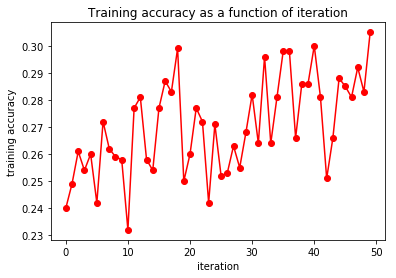

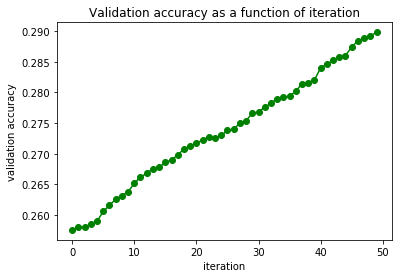

In [20]:
batch_size = 1
train_accs, val_accs = [], []
for i in range(NUM_OPT_STEPS):
    train(batch_size)
    if i % 100 == 0:
        train_accs.append(approx_train_accuracy(model))
        val_accs.append(val_accuracy(model))
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))
plot_accuracies(train_accs, val_accs)